# Combining 'train_df' and 'labels' datsets for the assesments alone.
# Building a training model on this newly created data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [7]:
train_df_asses = train_df[train_df['type'] == 'Assessment']

In [9]:
train_df_asses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925345 entries, 2185 to 11337825
Data columns (total 11 columns):
event_id           925345 non-null object
game_session       925345 non-null object
timestamp          925345 non-null object
event_data         925345 non-null object
installation_id    925345 non-null object
event_count        925345 non-null int64
event_code         925345 non-null int64
game_time          925345 non-null int64
title              925345 non-null object
type               925345 non-null object
world              925345 non-null object
dtypes: int64(3), object(8)
memory usage: 84.7+ MB


In [10]:
train_df_asses['title'].unique()

array(['Mushroom Sorter (Assessment)', 'Bird Measurer (Assessment)',
       'Cauldron Filler (Assessment)', 'Cart Balancer (Assessment)',
       'Chest Sorter (Assessment)'], dtype=object)

In [16]:
train_df_asses['game_session'].nunique()

21239

In [17]:
train_df_asses.drop(labels=['event_id', 'timestamp', 'event_data', 'event_code', 'type'], axis=1, inplace=True)

/home/harsh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
train_df_asses.head()

,game_session,installation_id,event_count,game_time,title,world
2185,901acc108f55a5a1,0006a69f,1,0,Mushroom Sorter (Assessment),TREETOPCITY
2186,901acc108f55a5a1,0006a69f,2,37,Mushroom Sorter (Assessment),TREETOPCITY
2187,901acc108f55a5a1,0006a69f,3,37,Mushroom Sorter (Assessment),TREETOPCITY
2188,901acc108f55a5a1,0006a69f,4,3901,Mushroom Sorter (Assessment),TREETOPCITY
2189,901acc108f55a5a1,0006a69f,5,3901,Mushroom Sorter (Assessment),TREETOPCITY


In [35]:
train_comb = train_df_asses.groupby('game_session').max()

In [36]:
train_comb.head()

,installation_id,event_count,game_time,title,world
game_session,,,,,
00097cda27afb726,01bdd720,36,27810,Mushroom Sorter (Assessment),TREETOPCITY
000f68cff32664ef,3f0dca37,201,118447,Chest Sorter (Assessment),CRYSTALCAVES
0014403daadf67aa,29d1aaee,79,719990,Bird Measurer (Assessment),TREETOPCITY
0014daa1d3e26eb2,55fdf49f,72,61995,Mushroom Sorter (Assessment),TREETOPCITY
0018a3df8beb755e,b204dbaf,3,79,Cart Balancer (Assessment),CRYSTALCAVES


In [38]:
train_lb = pd.read_csv('train_labels.csv')

In [39]:
train_lb.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [40]:
train_lb.set_index('game_session', inplace=True)

In [42]:
train_lb.head()

,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
game_session,,,,,,
6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [45]:
train_final = pd.merge(train_comb, train_lb, on=['game_session', 'installation_id', 'title'], how='outer')

In [46]:
train_final.head()

,installation_id,event_count,game_time,title,world,num_correct,num_incorrect,accuracy,accuracy_group
game_session,,,,,,,,,
00097cda27afb726,01bdd720,36,27810,Mushroom Sorter (Assessment),TREETOPCITY,1.0,0.0,1.000000,3.0
000f68cff32664ef,3f0dca37,201,118447,Chest Sorter (Assessment),CRYSTALCAVES,0.0,6.0,0.000000,0.0
0014403daadf67aa,29d1aaee,79,719990,Bird Measurer (Assessment),TREETOPCITY,1.0,3.0,0.250000,1.0
0014daa1d3e26eb2,55fdf49f,72,61995,Mushroom Sorter (Assessment),TREETOPCITY,1.0,2.0,0.333333,1.0
0018a3df8beb755e,b204dbaf,3,79,Cart Balancer (Assessment),CRYSTALCAVES,NaN,NaN,NaN,NaN


In [47]:
train_final.drop(['num_correct', 'num_incorrect'], axis=1, inplace=True)

In [48]:
train_final.head()

,installation_id,event_count,game_time,title,world,accuracy,accuracy_group
game_session,,,,,,,
00097cda27afb726,01bdd720,36,27810,Mushroom Sorter (Assessment),TREETOPCITY,1.000000,3.0
000f68cff32664ef,3f0dca37,201,118447,Chest Sorter (Assessment),CRYSTALCAVES,0.000000,0.0
0014403daadf67aa,29d1aaee,79,719990,Bird Measurer (Assessment),TREETOPCITY,0.250000,1.0
0014daa1d3e26eb2,55fdf49f,72,61995,Mushroom Sorter (Assessment),TREETOPCITY,0.333333,1.0
0018a3df8beb755e,b204dbaf,3,79,Cart Balancer (Assessment),CRYSTALCAVES,NaN,NaN


In [49]:
train_final.dropna(inplace=True)

In [51]:
train_final.head()

,installation_id,event_count,game_time,title,world,accuracy,accuracy_group
game_session,,,,,,,
00097cda27afb726,01bdd720,36,27810,Mushroom Sorter (Assessment),TREETOPCITY,1.000000,3.0
000f68cff32664ef,3f0dca37,201,118447,Chest Sorter (Assessment),CRYSTALCAVES,0.000000,0.0
0014403daadf67aa,29d1aaee,79,719990,Bird Measurer (Assessment),TREETOPCITY,0.250000,1.0
0014daa1d3e26eb2,55fdf49f,72,61995,Mushroom Sorter (Assessment),TREETOPCITY,0.333333,1.0
001c49e9e9968dbe,19d4b097,43,39023,Bird Measurer (Assessment),TREETOPCITY,0.500000,2.0


In [58]:
title = pd.get_dummies(train_final['title'])

In [59]:
title.head()

,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
game_session,,,,,
00097cda27afb726,0,0,0,0,1
000f68cff32664ef,0,0,0,1,0
0014403daadf67aa,1,0,0,0,0
0014daa1d3e26eb2,0,0,0,0,1
001c49e9e9968dbe,1,0,0,0,0


In [60]:
world = pd.get_dummies(train_final['world'])

In [61]:
world.head()

,CRYSTALCAVES,MAGMAPEAK,TREETOPCITY
game_session,,,
00097cda27afb726,0,0,1
000f68cff32664ef,1,0,0
0014403daadf67aa,0,0,1
0014daa1d3e26eb2,0,0,1
001c49e9e9968dbe,0,0,1


In [62]:
train_fn_df = pd.concat([train_final, title, world], axis=1)

In [63]:
train_fn_df.head()

,installation_id,event_count,game_time,title,world,accuracy,accuracy_group,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment),CRYSTALCAVES,MAGMAPEAK,TREETOPCITY
game_session,,,,,,,,,,,,,,,
00097cda27afb726,01bdd720,36,27810,Mushroom Sorter (Assessment),TREETOPCITY,1.000000,3.0,0,0,0,0,1,0,0,1
000f68cff32664ef,3f0dca37,201,118447,Chest Sorter (Assessment),CRYSTALCAVES,0.000000,0.0,0,0,0,1,0,1,0,0
0014403daadf67aa,29d1aaee,79,719990,Bird Measurer (Assessment),TREETOPCITY,0.250000,1.0,1,0,0,0,0,0,0,1
0014daa1d3e26eb2,55fdf49f,72,61995,Mushroom Sorter (Assessment),TREETOPCITY,0.333333,1.0,0,0,0,0,1,0,0,1
001c49e9e9968dbe,19d4b097,43,39023,Bird Measurer (Assessment),TREETOPCITY,0.500000,2.0,1,0,0,0,0,0,0,1


In [64]:
train_fn_df.drop(['title', 'world'], axis=1, inplace=True)

In [66]:
train_fn_df.head()

,installation_id,event_count,game_time,accuracy,accuracy_group,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment),CRYSTALCAVES,MAGMAPEAK,TREETOPCITY
game_session,,,,,,,,,,,,,
00097cda27afb726,01bdd720,36,27810,1.000000,3.0,0,0,0,0,1,0,0,1
000f68cff32664ef,3f0dca37,201,118447,0.000000,0.0,0,0,0,1,0,1,0,0
0014403daadf67aa,29d1aaee,79,719990,0.250000,1.0,1,0,0,0,0,0,0,1
0014daa1d3e26eb2,55fdf49f,72,61995,0.333333,1.0,0,0,0,0,1,0,0,1
001c49e9e9968dbe,19d4b097,43,39023,0.500000,2.0,1,0,0,0,0,0,0,1


In [195]:
train_fn = train_fn_df.groupby('installation_id').sum()

In [196]:
train_fn.head(10)

,event_count,game_time,accuracy,accuracy_group,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment),CRYSTALCAVES,MAGMAPEAK,TREETOPCITY
installation_id,,,,,,,,,,,,
0006a69f,244,227640,3.500000,11.0,2,0,0,0,3,0,0,5
0006c192,340,322671,1.500000,5.0,1,0,1,0,1,0,1,2
00129856,40,39701,1.000000,3.0,1,0,0,0,0,0,0,1
001d0ed0,194,194670,2.500000,8.0,1,1,0,1,2,2,0,3
00225f67,37,26517,0.000000,0.0,1,0,0,0,0,0,0,1
00279ac5,135,485348,0.000000,0.0,0,0,0,1,0,1,0,0
002db7e3,461,535402,4.290909,15.0,3,1,1,2,2,3,1,5
003372b0,238,242369,4.500000,14.0,1,2,1,1,1,3,1,2
004c2091,94,85122,2.000000,6.0,2,0,2,0,0,0,2,2


In [197]:
def accuracy_grp(row):
    row['accuracy'] = row['accuracy']/ (row['CRYSTALCAVES'] + row['MAGMAPEAK'] + row['TREETOPCITY'])
    if row['accuracy'] == 1: row['accuracy_group'] = 3.0
    elif row['accuracy'] >= 0.5: row['accuracy_group'] = 2.0
    elif row['accuracy'] > 0: row['accuracy_group'] = 1.0
    else: row['accuracy_group'] = 0.0
    #row['accuracy_group'] = row['accuracy']/ (row['CRYSTALCAVES'] + row['MAGMAPEAK'] + row['TREETOPCITY'])
    return row

In [198]:
train_fn = train_fn.apply(accuracy_grp, axis=1)

In [199]:
train_fn.head()

,event_count,game_time,accuracy,accuracy_group,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment),CRYSTALCAVES,MAGMAPEAK,TREETOPCITY
installation_id,,,,,,,,,,,,
0006a69f,244.0,227640.0,0.7,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0
0006c192,340.0,322671.0,0.5,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
00129856,40.0,39701.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
001d0ed0,194.0,194670.0,0.5,2.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,3.0
00225f67,37.0,26517.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [200]:
train_fn.drop(['accuracy', 'CRYSTALCAVES', 'MAGMAPEAK', 'TREETOPCITY'], inplace=True, axis=1)

In [201]:
train_fn.head()

,event_count,game_time,accuracy_group,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
installation_id,,,,,,,,
0006a69f,244.0,227640.0,2.0,2.0,0.0,0.0,0.0,3.0
0006c192,340.0,322671.0,2.0,1.0,0.0,1.0,0.0,1.0
00129856,40.0,39701.0,3.0,1.0,0.0,0.0,0.0,0.0
001d0ed0,194.0,194670.0,2.0,1.0,1.0,0.0,1.0,2.0
00225f67,37.0,26517.0,0.0,1.0,0.0,0.0,0.0,0.0


In [202]:
train_fn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3614 entries, 0006a69f to ffeb0b1b
Data columns (total 8 columns):
event_count                     3614 non-null float64
game_time                       3614 non-null float64
accuracy_group                  3614 non-null float64
Bird Measurer (Assessment)      3614 non-null float64
Cart Balancer (Assessment)      3614 non-null float64
Cauldron Filler (Assessment)    3614 non-null float64
Chest Sorter (Assessment)       3614 non-null float64
Mushroom Sorter (Assessment)    3614 non-null float64
dtypes: float64(8)
memory usage: 254.1+ KB


In [137]:
test_df = pd.read_csv('test.csv')

In [138]:
test_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [239]:
test_df_asses = test_df[test_df['type'] == 'Assessment']

In [240]:
test_df_asses.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
282,7ad3efc6,8b38fc0d2fd315dc,2019-09-11T18:56:11.918Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
283,65a38bf7,8b38fc0d2fd315dc,2019-09-11T18:56:12.019Z,"{""crystals"":[{""id"":""gem07"",""weight"":6},{""id"":""...",00abaee7,2,2020,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
284,795e4a37,8b38fc0d2fd315dc,2019-09-11T18:56:12.030Z,"{""description"":""We've got to balance this scal...",00abaee7,3,3010,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
285,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:15.790Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,4,4030,3852,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
286,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:17.869Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,5,4020,5968,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


In [241]:
test_df_asses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102627 entries, 282 to 1156413
Data columns (total 11 columns):
event_id           102627 non-null object
game_session       102627 non-null object
timestamp          102627 non-null object
event_data         102627 non-null object
installation_id    102627 non-null object
event_count        102627 non-null int64
event_code         102627 non-null int64
game_time          102627 non-null int64
title              102627 non-null object
type               102627 non-null object
world              102627 non-null object
dtypes: int64(3), object(8)
memory usage: 9.4+ MB


In [242]:
test_df_asses.drop(['event_id', 'timestamp', 'event_data', 'event_code', 'type'], axis=1, inplace=True)

/home/harsh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [243]:
test_df_asses.head()

,game_session,installation_id,event_count,game_time,title,world
282,8b38fc0d2fd315dc,00abaee7,1,0,Cart Balancer (Assessment),CRYSTALCAVES
283,8b38fc0d2fd315dc,00abaee7,2,58,Cart Balancer (Assessment),CRYSTALCAVES
284,8b38fc0d2fd315dc,00abaee7,3,58,Cart Balancer (Assessment),CRYSTALCAVES
285,8b38fc0d2fd315dc,00abaee7,4,3852,Cart Balancer (Assessment),CRYSTALCAVES
286,8b38fc0d2fd315dc,00abaee7,5,5968,Cart Balancer (Assessment),CRYSTALCAVES


In [244]:
test_final = test_df_asses.groupby('game_session').max()

In [245]:
test_final.head()

,installation_id,event_count,game_time,title,world
game_session,,,,,
001a139acd7fce92,285b65c8,130,181512,Bird Measurer (Assessment),TREETOPCITY
003bafadf2259738,56a739ec,74,168622,Bird Measurer (Assessment),TREETOPCITY
006b058c3bba11a2,d95dc7cb,35,33373,Mushroom Sorter (Assessment),TREETOPCITY
007195dd54b7c251,6cd8f2d8,27,34553,Cart Balancer (Assessment),CRYSTALCAVES
007b28de31382377,ce08e98b,47,32339,Mushroom Sorter (Assessment),TREETOPCITY


In [246]:
test_title = pd.get_dummies(test_final['title'])

In [248]:
test_title.head()

,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
game_session,,,,,
001a139acd7fce92,1,0,0,0,0
003bafadf2259738,1,0,0,0,0
006b058c3bba11a2,0,0,0,0,1
007195dd54b7c251,0,1,0,0,0
007b28de31382377,0,0,0,0,1


In [249]:
test_comb = pd.concat([test_final, test_title], axis=1)

In [251]:
test_comb.head()

,installation_id,event_count,game_time,title,world,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
game_session,,,,,,,,,,
001a139acd7fce92,285b65c8,130,181512,Bird Measurer (Assessment),TREETOPCITY,1,0,0,0,0
003bafadf2259738,56a739ec,74,168622,Bird Measurer (Assessment),TREETOPCITY,1,0,0,0,0
006b058c3bba11a2,d95dc7cb,35,33373,Mushroom Sorter (Assessment),TREETOPCITY,0,0,0,0,1
007195dd54b7c251,6cd8f2d8,27,34553,Cart Balancer (Assessment),CRYSTALCAVES,0,1,0,0,0
007b28de31382377,ce08e98b,47,32339,Mushroom Sorter (Assessment),TREETOPCITY,0,0,0,0,1


In [252]:
test_comb.drop(['title', 'world'], axis=1, inplace=True)

In [253]:
test_comb.head()

,installation_id,event_count,game_time,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
game_session,,,,,,,,
001a139acd7fce92,285b65c8,130,181512,1,0,0,0,0
003bafadf2259738,56a739ec,74,168622,1,0,0,0,0
006b058c3bba11a2,d95dc7cb,35,33373,0,0,0,0,1
007195dd54b7c251,6cd8f2d8,27,34553,0,1,0,0,0
007b28de31382377,ce08e98b,47,32339,0,0,0,0,1


In [284]:
test_fn = test_comb.groupby('installation_id').sum()

In [285]:
test_fn.head()

,event_count,game_time,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
installation_id,,,,,,,
00abaee7,27,30038,0,1,1,0,0
01242218,245,251298,1,2,1,1,1
017c5718,1,0,0,0,0,0,1
01a44906,1,0,0,0,0,0,1
01bc6cb6,1,0,0,1,0,0,0


In [286]:
test_fn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 00abaee7 to ffe774cc
Data columns (total 7 columns):
event_count                     1000 non-null int64
game_time                       1000 non-null int64
Bird Measurer (Assessment)      1000 non-null uint8
Cart Balancer (Assessment)      1000 non-null uint8
Cauldron Filler (Assessment)    1000 non-null uint8
Chest Sorter (Assessment)       1000 non-null uint8
Mushroom Sorter (Assessment)    1000 non-null uint8
dtypes: int64(2), uint8(5)
memory usage: 28.3+ KB


In [36]:
submission_df = pd.read_csv('sample_submission.csv')

In [37]:
submission_df.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


In [38]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
installation_id    1000 non-null object
accuracy_group     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


# Data Visualization

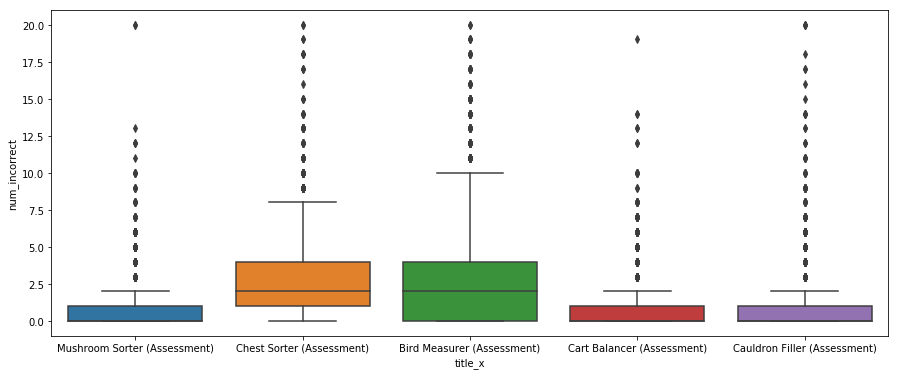

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(y='num_incorrect', x='title_x', data=train_final[train_final['num_incorrect'] <= 20])

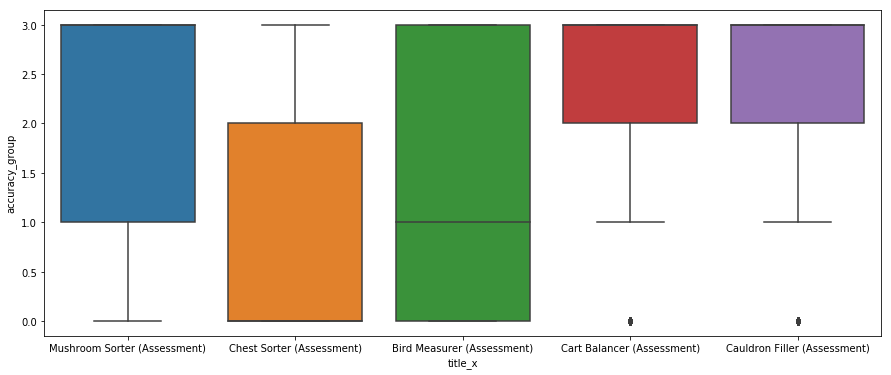

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(y='accuracy_group', x='title_x', data=train_final)

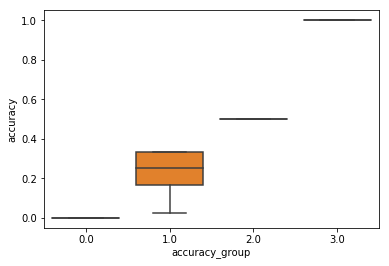

In [41]:
sns.boxplot(x='accuracy_group', y='accuracy', data=train_final)

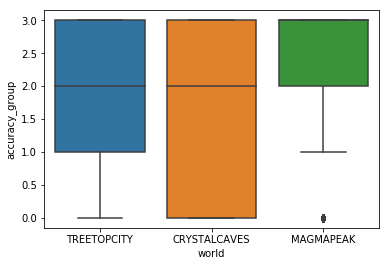

In [42]:
sns.boxplot(x='world', y='accuracy_group', data=train_final)

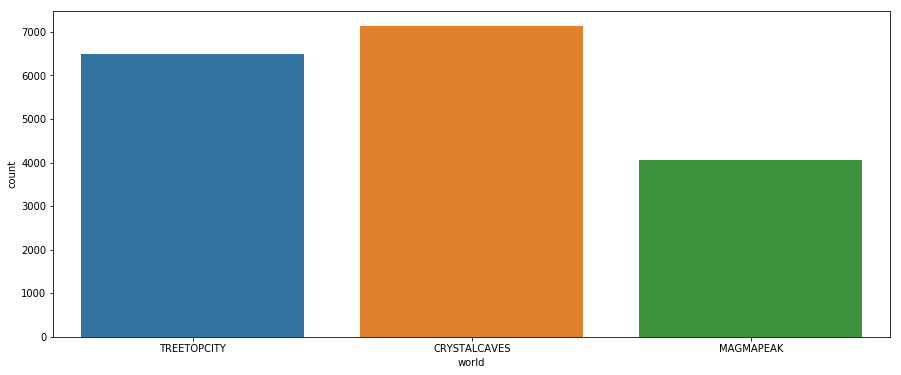

In [43]:
plt.figure(figsize =(15,6))
sns.countplot(x='world', data=train_final)

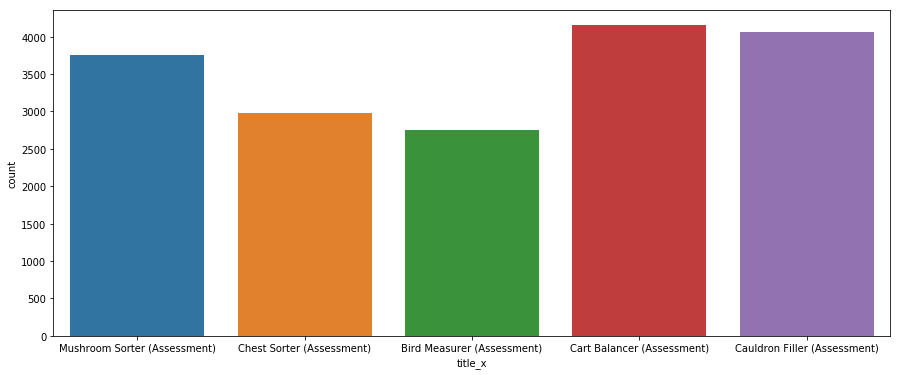

In [44]:
plt.figure(figsize =(15,6))
sns.countplot(x='title_x', data=train_final)

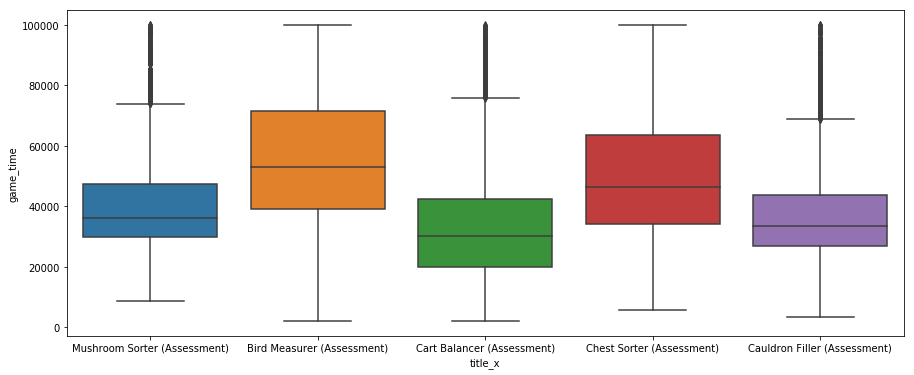

In [49]:
plt.figure(figsize=(15,6))
sns.boxplot(y='game_time', x='title_x', data=train_final[train_final['game_time'] <= 1*1e5])

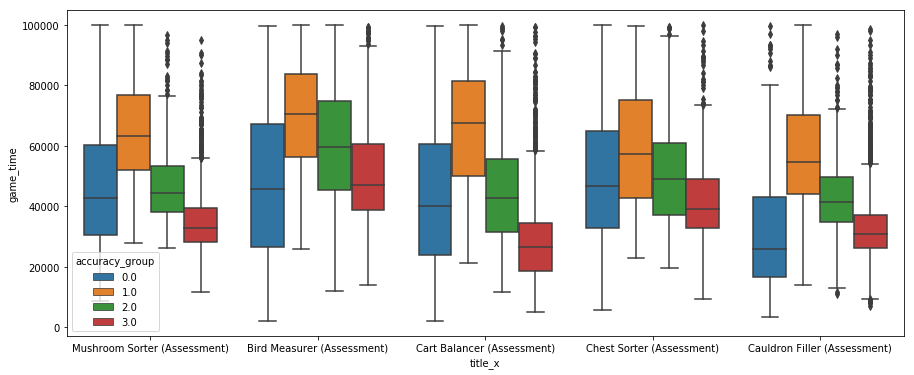

In [56]:
plt.figure(figsize=(15,6))
sns.boxplot(y='game_time', x='title_x', data=train_final[train_final['game_time'] <= 1*1e5], hue='accuracy_group')

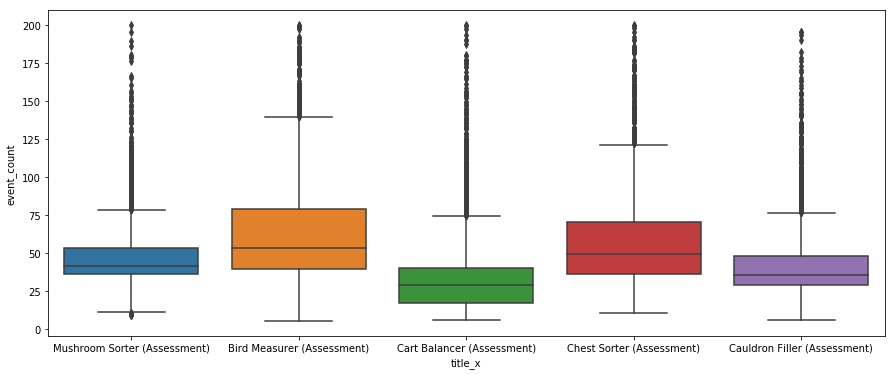

In [63]:
plt.figure(figsize=(15,6))
sns.boxplot(y='event_count', x='title_x', data=train_final[train_final['event_count'] <= 200])

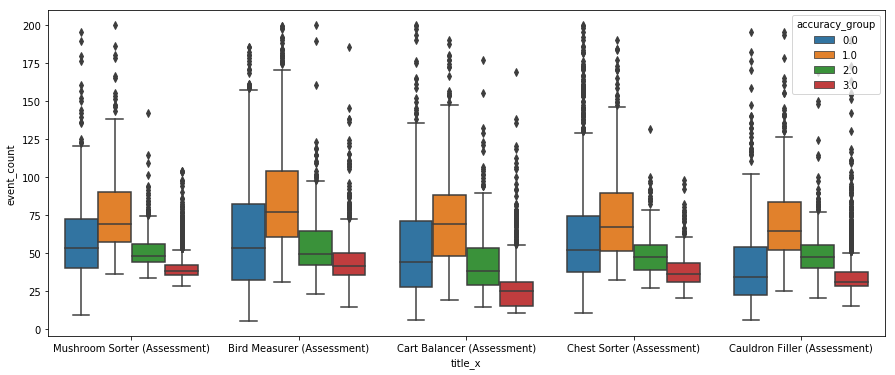

In [64]:
plt.figure(figsize=(15,6))
sns.boxplot(y='event_count', x='title_x', data=train_final[train_final['event_count'] <= 200], hue='accuracy_group')

# Converting object data into integral data

In [73]:
train_final.head()

,event_count,game_time,title_x,world,num_correct,num_incorrect,accuracy,accuracy_group
game_session,,,,,,,,
00097cda27afb726,36,27810,Mushroom Sorter (Assessment),TREETOPCITY,1.0,0.0,1.000000,3.0
000f68cff32664ef,201,118447,Chest Sorter (Assessment),CRYSTALCAVES,0.0,6.0,0.000000,0.0
0014403daadf67aa,79,719990,Bird Measurer (Assessment),TREETOPCITY,1.0,3.0,0.250000,1.0
0014daa1d3e26eb2,72,61995,Mushroom Sorter (Assessment),TREETOPCITY,1.0,2.0,0.333333,1.0
001c49e9e9968dbe,43,39023,Bird Measurer (Assessment),TREETOPCITY,1.0,1.0,0.500000,2.0


In [74]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17690 entries, 00097cda27afb726 to fff641eaf483ae2b
Data columns (total 8 columns):
event_count       17690 non-null int64
game_time         17690 non-null int64
title_x           17690 non-null object
world             17690 non-null object
num_correct       17690 non-null float64
num_incorrect     17690 non-null float64
accuracy          17690 non-null float64
accuracy_group    17690 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.8+ MB


In [71]:
world = pd.get_dummies(train_final['world'], drop_first=True)

In [72]:
world.head()

,MAGMAPEAK,TREETOPCITY
game_session,,
00097cda27afb726,0,1
000f68cff32664ef,0,0
0014403daadf67aa,0,1
0014daa1d3e26eb2,0,1
001c49e9e9968dbe,0,1


In [75]:
train_final = pd.concat([train_final, title, world], axis=1)

In [77]:
train_final.drop(['title_x', 'world'], axis=1, inplace=True)

In [78]:
train_final.head()

,event_count,game_time,num_correct,num_incorrect,accuracy,accuracy_group,Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment),MAGMAPEAK,TREETOPCITY
game_session,,,,,,,,,,,,
00097cda27afb726,36,27810,1.0,0.0,1.000000,3.0,0,0,0,1,0,1
000f68cff32664ef,201,118447,0.0,6.0,0.000000,0.0,0,0,1,0,0,0
0014403daadf67aa,79,719990,1.0,3.0,0.250000,1.0,0,0,0,0,0,1
0014daa1d3e26eb2,72,61995,1.0,2.0,0.333333,1.0,0,0,0,1,0,1
001c49e9e9968dbe,43,39023,1.0,1.0,0.500000,2.0,0,0,0,0,0,1


In [79]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17690 entries, 00097cda27afb726 to fff641eaf483ae2b
Data columns (total 12 columns):
event_count                     17690 non-null int64
game_time                       17690 non-null int64
num_correct                     17690 non-null float64
num_incorrect                   17690 non-null float64
accuracy                        17690 non-null float64
accuracy_group                  17690 non-null float64
Cart Balancer (Assessment)      17690 non-null uint8
Cauldron Filler (Assessment)    17690 non-null uint8
Chest Sorter (Assessment)       17690 non-null uint8
Mushroom Sorter (Assessment)    17690 non-null uint8
MAGMAPEAK                       17690 non-null uint8
TREETOPCITY                     17690 non-null uint8
dtypes: float64(4), int64(2), uint8(6)
memory usage: 1.7+ MB


In [105]:
test_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [123]:
test_asses = test_df[test_df['type'] == 'Assessment']

In [124]:
test_asses.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
282,7ad3efc6,8b38fc0d2fd315dc,2019-09-11T18:56:11.918Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
283,65a38bf7,8b38fc0d2fd315dc,2019-09-11T18:56:12.019Z,"{""crystals"":[{""id"":""gem07"",""weight"":6},{""id"":""...",00abaee7,2,2020,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
284,795e4a37,8b38fc0d2fd315dc,2019-09-11T18:56:12.030Z,"{""description"":""We've got to balance this scal...",00abaee7,3,3010,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
285,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:15.790Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,4,4030,3852,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
286,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:17.869Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,5,4020,5968,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


# Model Training and Cross Validation

In [257]:
train_fn.columns

Index(['event_count', 'game_time', 'accuracy_group',
       'Bird Measurer (Assessment)', 'Cart Balancer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Mushroom Sorter (Assessment)'],
      dtype='object')

In [258]:
features = ['event_count', 'game_time', 'Bird Measurer (Assessment)', 'Cart Balancer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Mushroom Sorter (Assessment)']

In [259]:
X = train_fn[features]
y = train_fn['accuracy_group']

In [206]:
from sklearn.model_selection import train_test_split

In [217]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
rfc = RandomForestClassifier(n_estimators=200)

In [220]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [221]:
rfc_preds = rfc.predict(X_val)

In [222]:
from sklearn.metrics import classification_report, confusion_matrix

In [223]:
print(classification_report(y_val, rfc_preds))

              precision    recall  f1-score   support

         0.0       0.51      0.42      0.46       111
         1.0       0.43      0.25      0.32       213
         2.0       0.65      0.80      0.72       513
         3.0       0.68      0.65      0.66       248

   micro avg       0.62      0.62      0.62      1085
   macro avg       0.57      0.53      0.54      1085
weighted avg       0.60      0.62      0.60      1085



In [224]:
print(confusion_matrix(y_val, rfc_preds))

[[ 47  17  26  21]
 [ 14  54 132  13]
 [ 13  48 410  42]
 [ 18   8  61 161]]


In [225]:
from sklearn.metrics import cohen_kappa_score

In [226]:
qwk = cohen_kappa_score(y_val, rfc_preds, weights='quadratic')
print(qwk)

0.43840868782918097


# Test and Submit

In [287]:
train_fn.columns

Index(['event_count', 'game_time', 'accuracy_group',
       'Bird Measurer (Assessment)', 'Cart Balancer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Mushroom Sorter (Assessment)'],
      dtype='object')

In [288]:
features = ['event_count', 'game_time', 'Bird Measurer (Assessment)', 'Cart Balancer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)', 'Mushroom Sorter (Assessment)']

In [289]:
X = train_fn[features]
y = train_fn['accuracy_group']

In [290]:
rfc = RandomForestClassifier(n_estimators=200)

In [291]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [292]:
rfc_preds = rfc.predict(test_fn)

In [293]:
test_fn.head()

,event_count,game_time,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
installation_id,,,,,,,
00abaee7,27,30038,0,1,1,0,0
01242218,245,251298,1,2,1,1,1
017c5718,1,0,0,0,0,0,1
01a44906,1,0,0,0,0,0,1
01bc6cb6,1,0,0,1,0,0,0


In [294]:
test_fn.reset_index(inplace=True)

In [295]:
test_fn.head()

,installation_id,event_count,game_time,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
0,00abaee7,27,30038,0,1,1,0,0
1,01242218,245,251298,1,2,1,1,1
2,017c5718,1,0,0,0,0,0,1
3,01a44906,1,0,0,0,0,0,1
4,01bc6cb6,1,0,0,1,0,0,0


In [309]:
submit = pd.read_csv('sample_submission.csv')

In [310]:
submit.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


In [311]:
submit['installation_id'] = test_fn['installation_id']

In [312]:
submit['installation_id'].head()

0    00abaee7
1    01242218
2    017c5718
3    01a44906
4    01bc6cb6
Name: installation_id, dtype: object

In [313]:
submit['accuracy_group'] = rfc_preds

In [314]:
submit['accuracy_group'] = submit['accuracy_group'].apply(lambda x: int(x))

In [315]:
submit.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,2
2,017c5718,0
3,01a44906,0
4,01bc6cb6,0


In [318]:
submit.to_csv('sample_submission.csv', index=False)